In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Visual Example: How does changing the parameters impact the logistic function

We will see how the logisitic function changes as we vary the values of the parameters. We define the function:

$$ y = \sigma (\beta_0 + \beta_1 x)$$

 We first fix the value of $\beta_0$ and see how changing $\beta_1$ affects the shape of the logistic function. The code below generates an animation, allowing you to see how the shape of the function changes as you vary $\beta_1$ between -3 and 3. The default value of $\beta_0$ is set to 1, set you own value by modifying the code below, the very first line of the `frames()` function. Can you guess how the function will look for specific values of $\beta_0$?


In [2]:
# define logistic function
def logistic_function(x, beta0, beta1):
  linear_part = beta0 + beta1 * x
  sigmoid = 1 / (1 + np.exp(-1 * linear_part))
  return sigmoid

# initalize plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_xlim(-5, 5)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('x')

# plot horizontal lines at 0 and 1
x_space = np.linspace(-5, 5, 100)
ax.hlines([0, 1], xmin = -5, xmax = 5, colors = 'k', linestyles = 'dashed')
# initalize sigmoid plot
sigmoid_plot, = ax.plot([], [], "b")

# define frames for animation
def frames():
  beta0 = 1
  x_space = np.linspace(-5, 5, 100)
  beta1_range = np.linspace(-3, 3, 61)
  for beta1 in beta1_range:
    yield logistic_function(x_space, beta0, beta1), beta1, beta0

# animation function
def animate(yields):
  x_space = np.linspace(-5, 5, 100)
  sigmoid_plot.set_data(x_space, yields[0])
  beta = '%s' % float('%.2g' % yields[1])
  ax.set_ylabel(f'y = $\sigma$( {yields[2]} ' r'+ $\beta_1$ x )')
  fig.suptitle(f'Logistic function: $\sigma$( {yields[2]} + '  r'$\beta_1$ x ), with $\beta_1 = $' + beta, fontsize = 15)

# animate
ani = FuncAnimation(fig=fig, func=animate, frames=frames, interval= 250, repeat=False, save_count = 250 * 4)
plt.close()
HTML(ani.to_jshtml())

We now repeat the same animation, but fix $\beta_1$ and vary $\beta_0$ between -3 and 3:

In [5]:
# initalize plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_xlim(-5, 5)
ax.set_ylim(-0.05, 1.05)
ax.set_xlabel('x')

# plot horizontal lines at 0 and 1
x_space = np.linspace(-5, 5, 100)
ax.hlines([0, 1], xmin = -5, xmax = 5, colors = 'k', linestyles = 'dashed')
# initalize sigmoid plot
sigmoid_plot, = ax.plot([], [], "b")

# define frames for animation
def frames():
  beta1 = 5
  x_space = np.linspace(-5, 5, 100)
  beta0_range = np.linspace(-3, 3, 61)
  for beta0 in beta0_range:
    yield logistic_function(x_space, beta0, beta1), beta1, beta0

# animation function
def animate(yields):
  x_space = np.linspace(-5, 5, 100)
  sigmoid_plot.set_data(x_space, yields[0])
  beta = '%s' % float('%.2g' % yields[2])
  ax.set_ylabel(r'y = $\sigma$($\beta_0$' + f'+ {yields[1]} x )')
  fig.suptitle(r'Logistic function: $\sigma$($\beta_0$ + '  + f'{yields[1]} x ), with ' + r'$\beta_0$ = ' + beta, fontsize = 15)

# animate
ani = FuncAnimation(fig=fig, func=animate, frames=frames, interval= 250, repeat=False, save_count = 250 * 4)
plt.close()
HTML(ani.to_jshtml())

# Exercise: How to choose variables for regression

Not all of the variables that you have available will be predictive of the output. It is useful to be able to test if a given variable is a significant predictor or not, one way to do this is to use Z scores. 

In the example below only $x_1$ is used to generate the output value, however the input given to the logistic regression is a 2d vector: $(x_1, x_2)$, as shown in the graph below. 

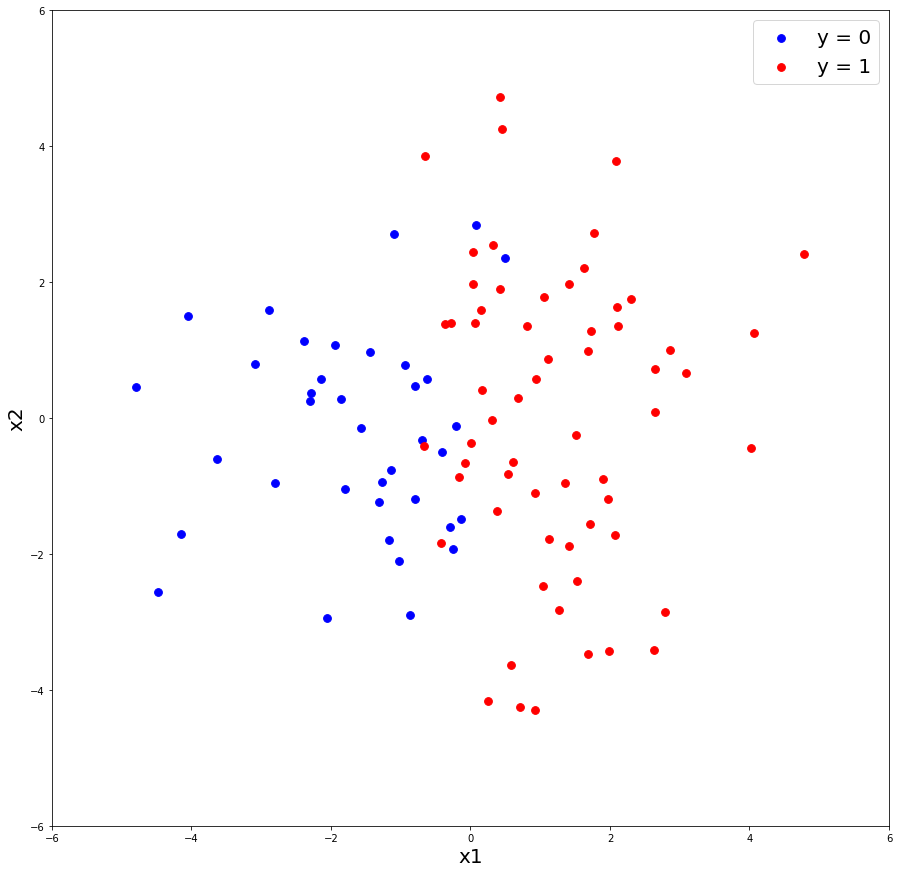

In [9]:
# Generate a data set
np.random.seed(1234)
x1 = np.random.normal(0,2,100)
x2 = np.random.normal(0,2,100)

y = logistic_function(x1 + np.random.normal(0,0.5,100), 0,1)

y = np.around(y)

X = np.vstack((x1,x2)).T


fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_xlabel("x1", size = 20)
ax.set_ylabel("x2", size = 20)
ax.scatter(x1[y == 0 ],x2[y == 0 ], c = "b", s = 60, label = "y = 0")
ax.scatter(x1[y == 1 ],x2[y == 1 ], c = "r", s = 60, label = "y = 1")
ax.legend(fontsize = 20)
plt.show()

Unfortunately, $\texttt{scikitlearn}$ does not support general statistical analysis, as such, there is no implementation that calculates the z-statistic. Instead, we will be using the $\texttt{statsmodels}$ package.

In order to put a numerical estimate on whether the logistic regression  needs $x_2$ or not we will use the $\texttt{statsmodels.api.Logit}$ function. 

This model automatically calculates the Z score, along with the probability of achieving that z score by random chance, and the two sided 95% confidance interval for the values for each $\beta_i$. These values can be seen using the $\texttt{.summary()}$ method as shown below. 

The columns of the table at the botom gives the values of the coeffecient, the standard error of the coeffecient, the z score, the probability of achieving an absolute value larger than the z score by chance, and the 0.025 and 0.975 quantiles of the distibution for each $\beta_i$. 

As can be seen, the z value for the coeffecient of $x_1$ is significantly higher than that of $x_2$.  In this case $\beta_2$ would not be considered as significant and should not be included in the model. 


In [13]:
pip install statsmodels

     |████████████████████████████████| 10.5 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 3.6 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.3
    Uninstalling packaging-20.3:
      Successfully uninstalled packaging-20.3
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
import statsmodels.api as sm

model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.217913
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                  0.6718
Time:                        19:28:45   Log-Likelihood:                -21.791
converged:                       True   LL-Null:                       -66.406
Covariance Type:            nonrobust   LLR p-value:                 3.514e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2227      0.758      4.253      0.000       1.737       4.708
x2             0.1466      0.184      0.796      0.426      -0.214       0.508
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Exercise: Fit a logistic regression model

In [39]:
import pandas as pd

df = pd.read_csv("diabetes2.csv")
print(df.columns)
cols = df.columns
X = df[cols[:-1]]
y = df[cols[-1]]

model = sm.Logit(y,X).fit()
model.summary()
# Complete this block of code to find the z score for each of the variables 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Jan 2024   Pseudo R-squ.:                 0.05922
Time:                        21:26:38   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""